In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("covid_19_data(updated).csv")
print(data.shape)
data.head()

(29426, 8)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [2]:
russia_y = []
india_y = []

tempsum_russia = 0
tempsum_india = 0
for i in range(0, len(data)):
        if data.iloc[i, 3] == "Russia": 
            tempsum_russia = data.iloc[i, 5]
            russia_y.append(tempsum_russia)
        if data.iloc[i, 3] == "India": 
            tempsum_india = data.iloc[i, 5]
            india_y.append(tempsum_india)
        
print("russia cases up to 20/05/2020: {}".format(russia_y[len(russia_y) - 1]))
print("india cases up to 20/05/2020: {}".format(india_y[len(india_y) - 1]))
len(india_y)

russia cases up to 20/05/2020: 353427.0
india cases up to 20/05/2020: 144950.0


117

In [3]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 22/01/2020")

plt.plot(russia_y, color='red', label='russia')
plt.plot(india_y, color='green', label='India')
plt.legend()
plt.show()
print(india_y)

<Figure size 640x480 with 1 Axes>

[1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 28.0, 30.0, 31.0, 34.0, 39.0, 43.0, 56.0, 62.0, 73.0, 82.0, 102.0, 113.0, 119.0, 142.0, 156.0, 194.0, 244.0, 330.0, 396.0, 499.0, 536.0, 657.0, 727.0, 887.0, 987.0, 1024.0, 1251.0, 1397.0, 1998.0, 2543.0, 2567.0, 3082.0, 3588.0, 4778.0, 5311.0, 5916.0, 6725.0, 7598.0, 8446.0, 9205.0, 10453.0, 11487.0, 12322.0, 13430.0, 14352.0, 15722.0, 17615.0, 18539.0, 20080.0, 21370.0, 23077.0, 24530.0, 26283.0, 27890.0, 29451.0, 31324.0, 33062.0, 34863.0, 37257.0, 39699.0, 42505.0, 46437.0, 49400.0, 52987.0, 56351.0, 59695.0, 62808.0, 67161.0, 70768.0, 74292.0, 78055.0, 81997.0, 85784.0, 90648.0, 95698.0, 100328.0, 106475.0, 112028.0, 118226.0, 124794.0, 131423.0, 138536.0, 144950.0]


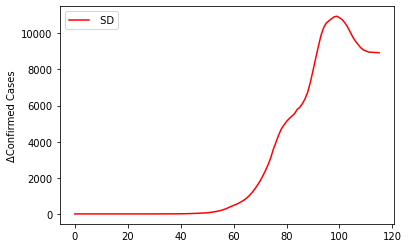

116

In [4]:
from scipy.signal import savgol_filter

deriv_russia = savgol_filter(russia_y, 9, 2, 1) #Polynomial degree is 2 since the function should look like a parabola

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_russia, color='red', label=" SD")
plt.legend()
plt.show()
len(russia_y)

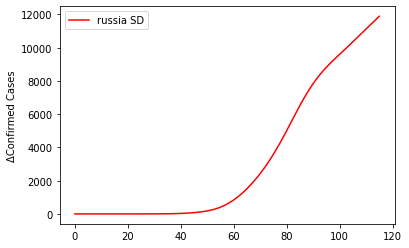

[1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 28.0, 30.0, 31.0, 34.0, 39.0, 43.0, 56.0, 62.0, 73.0, 82.0, 102.0, 113.0, 119.0, 142.0, 156.0, 194.0, 244.0, 330.0, 396.0, 499.0, 536.0, 657.0, 727.0, 887.0, 987.0, 1024.0, 1251.0, 1397.0, 1998.0, 2543.0, 2567.0, 3082.0, 3588.0, 4778.0, 5311.0, 5916.0, 6725.0, 7598.0, 8446.0, 9205.0, 10453.0, 11487.0, 12322.0, 13430.0, 14352.0, 15722.0, 17615.0, 18539.0, 20080.0, 21370.0, 23077.0, 24530.0, 26283.0, 27890.0, 29451.0, 31324.0, 33062.0, 34863.0, 37257.0, 39699.0, 42505.0, 46437.0, 49400.0, 52987.0, 56351.0, 59695.0, 62808.0, 67161.0, 70768.0, 74292.0, 78055.0, 81997.0, 85784.0, 90648.0, 95698.0, 100328.0, 106475.0, 112028.0, 118226.0, 124794.0, 131423.0, 138536.0, 144950.0]


In [5]:
from scipy.signal import savgol_filter

deriv_russia = savgol_filter(russia_y, int((len(russia_y)+1)/3), 2, 1)
deriv_russia = savgol_filter(deriv_russia, int((len(russia_y)-1)/5), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_russia, color='red', label="russia SD")
plt.legend()
plt.show()
print(india_y)

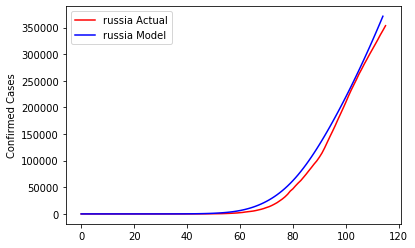

[1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 28.0, 30.0, 31.0, 34.0, 39.0, 43.0, 56.0, 62.0, 73.0, 82.0, 102.0, 113.0, 119.0, 142.0, 156.0, 194.0, 244.0, 330.0, 396.0, 499.0, 536.0, 657.0, 727.0, 887.0, 987.0, 1024.0, 1251.0, 1397.0, 1998.0, 2543.0, 2567.0, 3082.0, 3588.0, 4778.0, 5311.0, 5916.0, 6725.0, 7598.0, 8446.0, 9205.0, 10453.0, 11487.0, 12322.0, 13430.0, 14352.0, 15722.0, 17615.0, 18539.0, 20080.0, 21370.0, 23077.0, 24530.0, 26283.0, 27890.0, 29451.0, 31324.0, 33062.0, 34863.0, 37257.0, 39699.0, 42505.0, 46437.0, 49400.0, 52987.0, 56351.0, 59695.0, 62808.0, 67161.0, 70768.0, 74292.0, 78055.0, 81997.0, 85784.0, 90648.0, 95698.0, 100328.0, 106475.0, 112028.0, 118226.0, 124794.0, 131423.0, 138536.0, 144950.0]


In [6]:
from scipy import integrate

russia_y_pred = integrate.cumtrapz(deriv_russia) 

plt.ylabel("Confirmed Cases")

plt.plot(russia_y, color='red', label="russia Actual")
plt.plot(russia_y_pred, color='blue', label='russia Model')
plt.legend()
plt.show()
print(india_y)

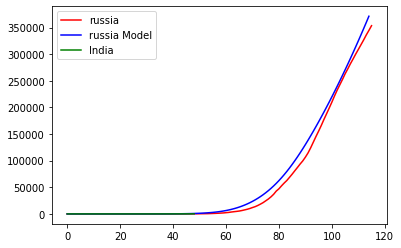

In [7]:
india_y = india_y[:49]
deriv_india = savgol_filter(india_y, 5, 2, 1)
deriv_india = savgol_filter(deriv_india, 9, 3, 0)

plt.plot(russia_y, color='red', label='russia')
plt.plot(russia_y_pred, color='blue', label="russia Model")
plt.plot(india_y, color='green', label='India')
plt.legend()
plt.show()

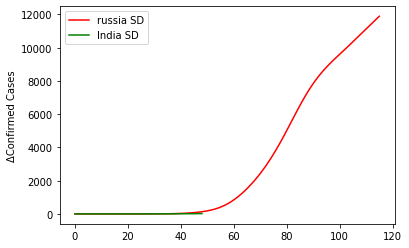

In [8]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_russia, color='red', label='russia SD')
plt.plot(deriv_india, color='green', label='India SD')
plt.legend()
plt.show()

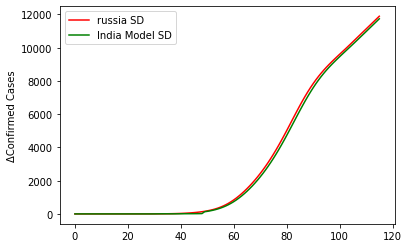

In [9]:
india_derv_model = np.roll(deriv_russia, 1)
india_derv_model = savgol_filter(india_derv_model, 19, 2, 0)
india_basic_model= []
for i in range(49):
    india_basic_model.append(deriv_india[i])

for i in range(49, len(india_derv_model)):
    india_basic_model.append(india_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_russia, color='red', label="russia SD")
plt.plot(india_basic_model, color='green', label='India Model SD')
plt.legend()
plt.show()

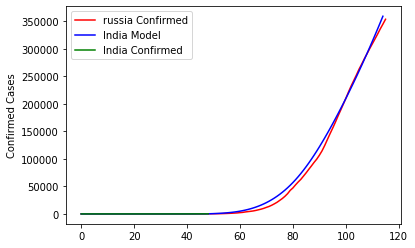

array([-1.10281385e-01,  2.29978355e-01,  7.43506494e-01,  1.23181818e+00,
        1.59632035e+00,  1.80389610e+00,  1.86969697e+00,  1.85779221e+00,
        1.83203463e+00,  1.82294372e+00,  1.82294372e+00,  1.82294372e+00,
        1.82294372e+00,  1.82294372e+00,  1.82294372e+00,  1.82294372e+00,
        1.82294372e+00,  1.82294372e+00,  1.82294372e+00,  1.82294372e+00,
        1.82294372e+00,  1.82294372e+00,  1.82294372e+00,  1.82294372e+00,
        1.82294372e+00,  1.80476190e+00,  1.77142857e+00,  1.57186147e+00,
        1.29242424e+00,  1.64090909e+00,  3.42164502e+00,  7.14350649e+00,
        1.25212121e+01,  1.86038961e+01,  2.45906926e+01,  2.99010823e+01,
        3.45883117e+01,  3.94339827e+01,  4.52787879e+01,  5.28928571e+01,
        6.22692641e+01,  7.28948052e+01,  8.44378788e+01,  9.66818182e+01,
        1.09609091e+02,  1.23512013e+02,  1.39141126e+02,  1.57609091e+02,
        2.32372710e+02,  3.73716870e+02,  5.41186678e+02,  7.39253474e+02,
        9.73080615e+02,  

In [10]:
india_basic_model_confirmed = integrate.cumtrapz(india_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(russia_y, color='red', label='russia Confirmed')
plt.plot(india_basic_model_confirmed, color='blue', label='India Model')
plt.plot(india_y, color='green', label='India Confirmed')
plt.legend()
plt.show()
india_basic_model_confirmed

In [11]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

start_pred = 1585353600
for i in range(94, len(india_basic_model_confirmed)):
    t = time.strftime('%Y-%m-%d', time.localtime(start_pred))
    pred = india_basic_model_confirmed[i]
    predictions.at[i-94, "Date"] = t
    predictions.at[i-94, "Predicted Cases"] = int(pred)
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
0,2020-03-28,154737
1,2020-03-29,163467
2,2020-03-30,172370
3,2020-03-31,181437
4,2020-04-01,190663
5,2020-04-02,200044
6,2020-04-03,209576
7,2020-04-04,219258
8,2020-04-05,229090
9,2020-04-06,239070
